## Домашнее задание

In [1]:
import pandas as pd

**Задание 1**  

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:  
- оценка 2 и меньше - низкий рейтинг  
- оценка 4 и меньше - средний рейтинг  
- оценка 4.5 и 5 - высокий рейтинг  

Результат классификации запишите в столбец class

In [2]:
def raiting_class(rating):
    if rating <= 2:
        return 'низкий рейтинг'
    elif rating <= 4:
        return 'средний рейтинг'
    else:
        return 'высокий рейтинг'

data=pd.read_csv('ml-latest-small/ratings.csv')
data['class'] = data['rating'].apply(raiting_class)
data.head(10)

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг
5,1,1263,2.0,1260759151,низкий рейтинг
6,1,1287,2.0,1260759187,низкий рейтинг
7,1,1293,2.0,1260759148,низкий рейтинг
8,1,1339,3.5,1260759125,средний рейтинг
9,1,1343,2.0,1260759131,низкий рейтинг


**Задание 2**  

Используем файл keywords.csv.  

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.  

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:  

In [3]:
geo_data = {
        'Центр': ['москва', 'тула', 'ярославль'],
        'Северо-Запад': ['петербург', 'псков', 'мурманск'],
        'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
        }

Результат классификации запишите в отдельный столбец region.

In [14]:
def geo_classified(row):
    if 'москва' in row['keyword'] or 'тула' in row['keyword'] or 'ярославль' in row['keyword']:
        return 'Центр'
    elif 'петербург' in row['keyword'] or 'псков' in row['keyword'] or 'мурманск' in row['keyword']:
        return 'Северо-Запад'
    elif 'владивосток' in row['keyword'] or 'сахалин' in row['keyword'] or 'хабаровск' in row['keyword']:
        return 'Дальний Восток'
    else:
        return 'undefined'

data_region = pd.read_csv('keywords.csv')
data_region['region'] = data_region.apply(geo_classified, axis=1)

data_region_test = data_region[data_region['keyword'].str.contains('мурманск')]
data_region_test.head(10)

,keyword,shows,region
2398,авито мурманск,89787,Северо-Запад
5026,авито мурманская область,48756,Северо-Запад
8977,мурманск,29984,Северо-Запад
9945,погода в мурманске,28100,Северо-Запад
17975,гисметео мурманск,16928,Северо-Запад
18087,мкап работа мурманск,17002,Северо-Запад
18472,погода в мурманске на неделю,16865,Северо-Запад
22988,погода мурманск,17908,Северо-Запад
24845,авито авто с пробегом мурманск и область,12775,Северо-Запад
27548,работа в мурманске,11691,Северо-Запад


**Задание 3 (бонусное)**  

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.  

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:  

В переменную years запишите список из всех годов с 1950 по 2010.  

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:  

- для каждой строки пройдите по всем годам списка years
- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
- Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [29]:
movies_data = pd.read_csv('ml-latest-small/movies.csv')
ratings_data = pd.read_csv('ml-latest-small/ratings.csv')

Summary_data = ratings_data.merge(movies_data, on=["movieId"])
Summary_data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama
5,39,31,3.0,832525157,Dangerous Minds (1995),Drama
6,73,31,3.5,1255591860,Dangerous Minds (1995),Drama
7,88,31,3.0,1239755559,Dangerous Minds (1995),Drama
8,96,31,2.5,1223256331,Dangerous Minds (1995),Drama
9,110,31,4.0,840100695,Dangerous Minds (1995),Drama


In [30]:
years = []
for year in range(1950,2011):
    years.append(year)
print(years)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


In [31]:
def production_year(title):
    for year in years:
        if str(year) in title:
            return year
    return 1900

In [32]:
Summary_data['year'] = Summary_data['title'].apply(production_year)
Summary_data.head(10)

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,1995
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,1995
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,1995
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,1995
5,39,31,3.0,832525157,Dangerous Minds (1995),Drama,1995
6,73,31,3.5,1255591860,Dangerous Minds (1995),Drama,1995
7,88,31,3.0,1239755559,Dangerous Minds (1995),Drama,1995
8,96,31,2.5,1223256331,Dangerous Minds (1995),Drama,1995
9,110,31,4.0,840100695,Dangerous Minds (1995),Drama,1995


In [27]:
movies_rating_mean = Summary_data.groupby('year').mean().reset_index()[['year','rating']]
movies_rating_mean.head(10)

,year,rating
0,1900,3.602960
1,1950,3.915254
2,1951,3.983539
3,1952,4.000000
4,1953,3.754587
5,1954,3.994220
6,1955,3.751724
7,1956,3.617647
8,1957,4.014241
9,1958,3.823171


In [37]:
movies_rating_mean.sort_values('rating', ascending=False).head(15)

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
5,1954,3.994220
2,1951,3.983539
25,1974,3.978704
13,1962,3.952446
1,1950,3.915254
28,1977,3.905786
15,1964,3.841492


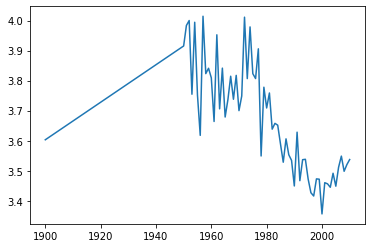

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(movies_rating_mean['year'], movies_rating_mean['rating'])
plt.show()

**Вывод:**
Если принять к учету, что в категорию с годом 1900 попали фильмы, у которых в названии не указан год и фильмы, вышедшие до 1950 года и после 2010, то по общему тренду видно, что действительно для более новых фильмов рейтинг ухудшается